In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install dash

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install nbformat --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import numpy as np
import random as rdm
import math
import dash
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import plotly.io as pio
from plotly.subplots import make_subplots
from dash import dcc, html, Input, Output
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal
from sqlalchemy import create_engine

In [9]:
db_name = 'projeto triplice alianca'
db_user = 'postgres'
db_password = '1234'
db_host = 'localhost'
db_port = '5432'

In [10]:
conn = psycopg2.connect(database = "projeto triplice alianca", 
                        user = "postgres", 
                        host= 'localhost',
                        password = "1234",
                        port = 5432)

query = "SELECT * FROM desempenho"

df = pd.read_sql_query(query, conn)

C:\Users\alnal\AppData\Local\Temp\ipykernel_19056\3526114083.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [11]:
df.head()

,id_desempenho,id_maquina_fk,tempo_processamento,tamanho_amostra,algoritmo,cenarios,tipo_dado
0,1,1,15897.1,10000,BubbleSort,Ordenado crescente,int
1,2,1,1915.3,10000,QuickSort,Ordenado crescente,int
2,3,1,1788.5,10000,ShellSort,Ordenado crescente,int
3,4,1,1605.6,10000,MergeSort,Ordenado crescente,int
4,5,1,947459.5,100000,BubbleSort,Ordenado crescente,int


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_desempenho        3672 non-null   int64  
 1   id_maquina_fk        3672 non-null   int64  
 2   tempo_processamento  3672 non-null   float64
 3   tamanho_amostra      3672 non-null   int64  
 4   algoritmo            3672 non-null   object 
 5   cenarios             3672 non-null   object 
 6   tipo_dado            3672 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 200.9+ KB


In [13]:
df_grouped = df.groupby('algoritmo')['tempo_processamento'].mean()

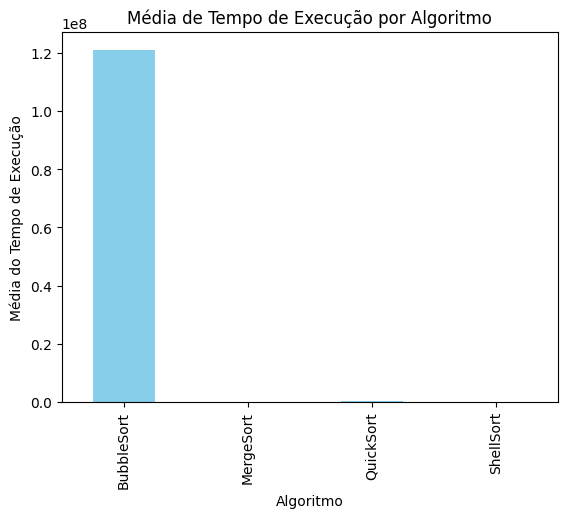

In [14]:
df_grouped.plot(kind='bar', color='skyblue')

plt.title('Média de Tempo de Execução por Algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Média do Tempo de Execução')
plt.show()

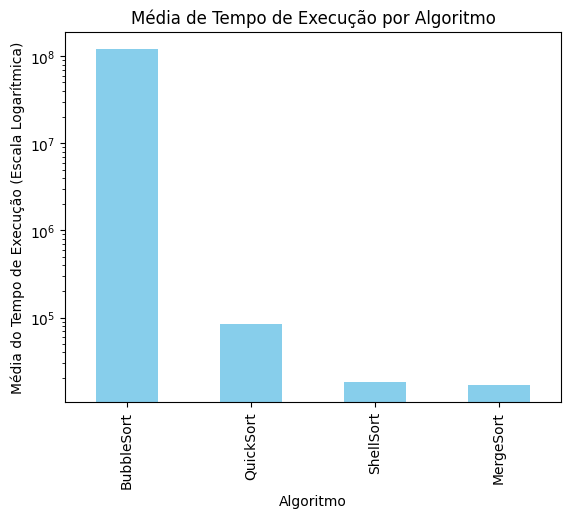

In [15]:
df_grouped_sorted = df_grouped.sort_values(ascending=False)

df_grouped_sorted.plot(kind='bar', color='skyblue')

plt.yscale('log')

plt.title('Média de Tempo de Execução por Algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Média do Tempo de Execução (Escala Logarítmica)')

plt.show()

In [16]:
amostra = rdm.sample(df['tempo_processamento'].tolist(), 1339)

In [17]:
std = np.array(amostra).std()
std

np.float64(219030489.253044)

In [18]:
amostra_df = pd.DataFrame(amostra)
media = amostra_df.mean()
media

0    2.443016e+07
dtype: float64

In [19]:
Z = 1.96

In [20]:
n = len(amostra)
n

1339

In [21]:
left_limit = media - (Z * (std / math.sqrt(n)))
left_limit

0    1.269820e+07
dtype: float64

In [22]:
right_limit = media + (Z * (std / math.sqrt(n)))
right_limit

0    3.616211e+07
dtype: float64

In [23]:
dados = df["tempo_processamento"]

stat, p_value = shapiro(dados)
print(f"Estatística do teste: {stat}, p-valor: {p_value}")

if p_value > 0.05:
    print("Os dados seguem uma distribuição normal (não rejeita H0).")
else:
    print("Os dados não seguem uma distribuição normal (rejeita H0).")

Estatística do teste: 0.09082019309461153, p-valor: 1.3563666120493207e-85
Os dados não seguem uma distribuição normal (rejeita H0).


In [24]:
grupos = [grupo["tempo_processamento"].values for _, grupo in df.groupby("algoritmo")]
stat, p_value = kruskal(*grupos)
print(f"H-statistic: {stat}, p-value: {p_value}")

H-statistic: 1641.4184236433325, p-value: 0.0


In [25]:
tukey = pairwise_tukeyhsd(df["tempo_processamento"], df["algoritmo"])
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
  group1     group2      meandiff    p-adj      lower          upper      reject
--------------------------------------------------------------------------------
BubbleSort MergeSort -121177651.0031   0.0 -151498412.5306 -90856889.4755   True
BubbleSort QuickSort -121110083.4539   0.0 -151430844.9815 -90789321.9264   True
BubbleSort ShellSort  -121176058.523   0.0 -151496820.0505 -90855296.9955   True
 MergeSort QuickSort      67567.5491   1.0  -30253193.9784  30388329.0767  False
 MergeSort ShellSort       1592.4801   1.0  -30319169.0475  30322354.0076  False
 QuickSort ShellSort     -65975.0691   1.0  -30386736.5966  30254786.4585  False
--------------------------------------------------------------------------------


In [26]:
tukey = pairwise_tukeyhsd(df["tempo_processamento"], df["id_maquina_fk"])
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff    p-adj      lower          upper     reject
-----------------------------------------------------------------------
     1      2  -1594019.7882 0.9872 -26045816.3838 22857776.8075  False
     1      3 -16516716.8382 0.2528 -40968513.4338  7935079.7575  False
     2      3   -14922697.05 0.3251 -39374493.6456  9529099.5456  False
-----------------------------------------------------------------------


In [27]:
def intervalo_confiança(dados, conf=0.95):
    n = len(dados)
    media = np.mean(dados)
    sem = stats.sem(dados)
    t_critico = stats.t.ppf((1 + conf) / 2, df=n-1)
    margem_erro = t_critico * sem
    return media - margem_erro, media + margem_erro

resultados = {}
for algoritmo in df["algoritmo"].unique():
    dados = df[df["algoritmo"] == algoritmo]["tempo_processamento"]
    ic = intervalo_confiança(dados)
    resultados[algoritmo] = ic
    print(f"Algoritmo: {algoritmo}, Intervalo de Confiança: {ic}")

Algoritmo: BubbleSort, Intervalo de Confiança: (np.float64(88452296.25207858), np.float64(153936731.9442177))
Algoritmo: QuickSort, Intervalo de Confiança: (np.float64(58073.257556529985), np.float64(110788.03089662909))
Algoritmo: ShellSort, Intervalo de Confiança: (np.float64(14244.806564943869), np.float64(22666.343761853514))
Algoritmo: MergeSort, Intervalo de Confiança: (np.float64(15301.66751779797), np.float64(18424.52267828046))


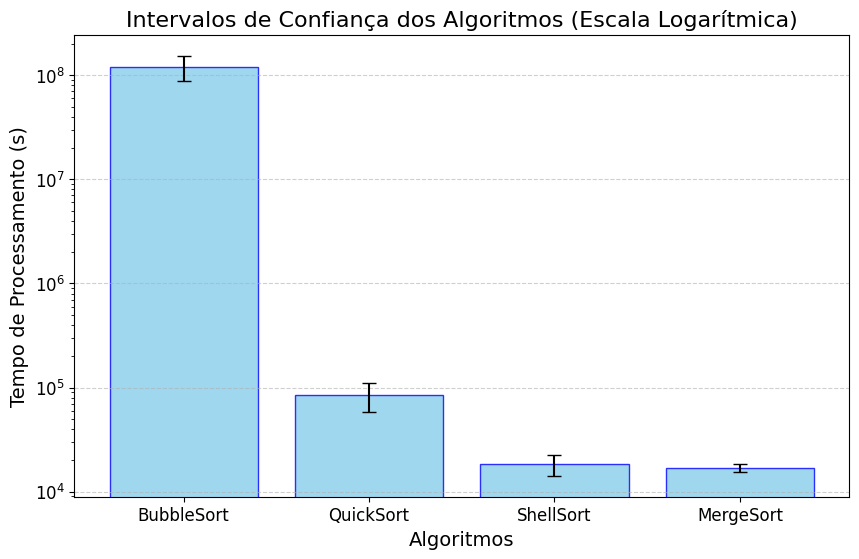

In [28]:
algoritmos = list(resultados.keys())
medias = [np.mean(df[df["algoritmo"] == alg]["tempo_processamento"]) for alg in algoritmos]
inferiores = [resultados[alg][0] for alg in algoritmos]
superiores = [resultados[alg][1] for alg in algoritmos]
erros = [(sup - inf) / 2 for sup, inf in zip(superiores, inferiores)]  # Erros para as barras

plt.figure(figsize=(10, 6))
plt.bar(algoritmos, medias, yerr=erros, capsize=5, color="skyblue", alpha=0.8, edgecolor="blue")
plt.yscale('log')
plt.xlabel("Algoritmos", fontsize=14)
plt.ylabel("Tempo de Processamento (s)", fontsize=14)
plt.title("Intervalos de Confiança dos Algoritmos (Escala Logarítmica)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

<Figure size 1000x600 with 0 Axes>

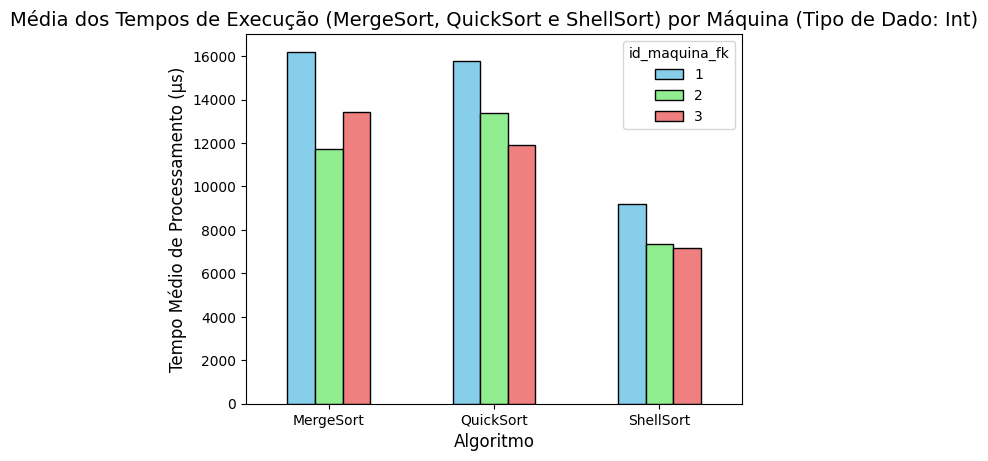

In [29]:
df_filtrado_int = df[(df['algoritmo'].isin(['MergeSort', 'QuickSort', 'ShellSort'])) & (df['tipo_dado'] == 'int')]

media_por_algoritmo_maquina_int = df_filtrado_int.groupby(['algoritmo', 'id_maquina_fk'])['tempo_processamento'].mean().unstack()

plt.figure(figsize=(10, 6))

media_por_algoritmo_maquina_int.plot(kind='bar', stacked=False, color=['skyblue', 'lightgreen', 'lightcoral'], edgecolor='black')

plt.title("Média dos Tempos de Execução (MergeSort, QuickSort e ShellSort) por Máquina (Tipo de Dado: Int)", fontsize=14)
plt.xlabel("Algoritmo", fontsize=12)
plt.ylabel("Tempo Médio de Processamento (µs)", fontsize=12)

plt.xticks(rotation=0)

plt.show()

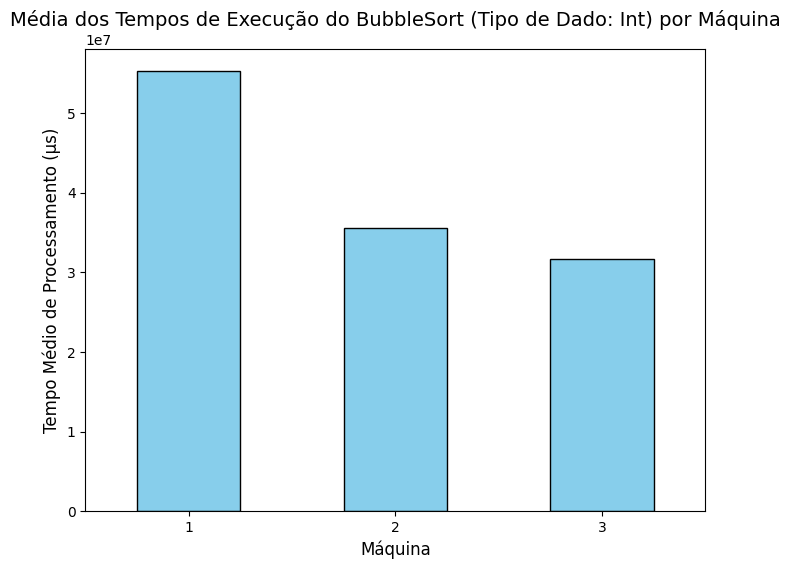

In [30]:
df_bubble_sort_int = df[(df['algoritmo'] == 'BubbleSort') & (df['tipo_dado'] == 'int')]

media_bubble_sort_int_maquina = df_bubble_sort_int.groupby(['id_maquina_fk'])['tempo_processamento'].mean()

plt.figure(figsize=(8, 6))

media_bubble_sort_int_maquina.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Média dos Tempos de Execução do BubbleSort (Tipo de Dado: Int) por Máquina", fontsize=14)
plt.xlabel("Máquina", fontsize=12)
plt.ylabel("Tempo Médio de Processamento (µs)", fontsize=12)

plt.xticks(rotation=0)

plt.show()

<Figure size 1000x600 with 0 Axes>

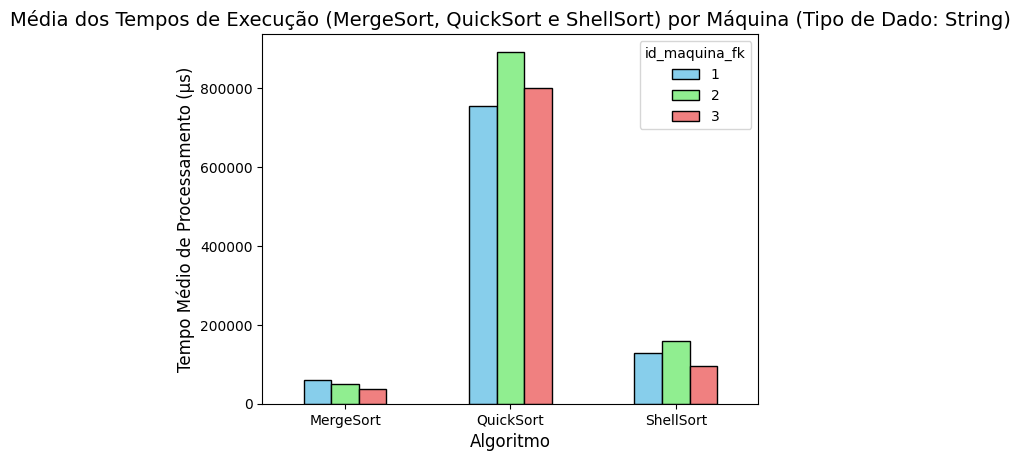

In [31]:
df_filtrado_string = df[(df['algoritmo'].isin(['MergeSort', 'QuickSort', 'ShellSort'])) & (df['tipo_dado'] == 'string')]

media_por_algoritmo_maquina_string = df_filtrado_string.groupby(['algoritmo', 'id_maquina_fk'])['tempo_processamento'].mean().unstack()

plt.figure(figsize=(10, 6))

media_por_algoritmo_maquina_string.plot(kind='bar', stacked=False, color=['skyblue', 'lightgreen', 'lightcoral'], edgecolor='black')

plt.title("Média dos Tempos de Execução (MergeSort, QuickSort e ShellSort) por Máquina (Tipo de Dado: String)", fontsize=14)
plt.xlabel("Algoritmo", fontsize=12)
plt.ylabel("Tempo Médio de Processamento (µs)", fontsize=12)

plt.xticks(rotation=0)

plt.show()

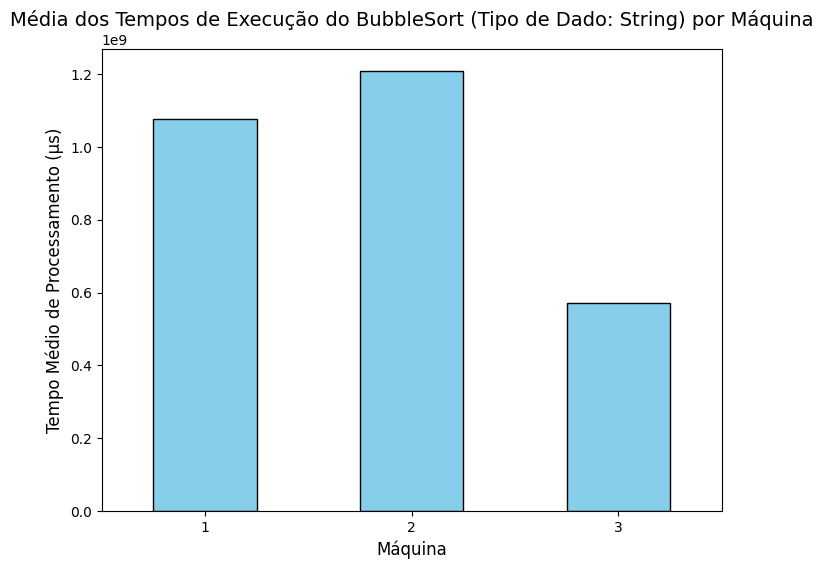

In [32]:
df_bubble_sort_string = df[(df['algoritmo'] == 'BubbleSort') & (df['tipo_dado'] == 'string')]

media_bubble_sort_string_maquina = df_bubble_sort_string.groupby(['id_maquina_fk'])['tempo_processamento'].mean()

plt.figure(figsize=(8, 6))

media_bubble_sort_string_maquina.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Média dos Tempos de Execução do BubbleSort (Tipo de Dado: String) por Máquina", fontsize=14)
plt.xlabel("Máquina", fontsize=12)
plt.ylabel("Tempo Médio de Processamento (µs)", fontsize=12)

plt.xticks(rotation=0)

plt.show()

In [33]:
conn.close()